In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
missing_values = df.isnull().sum()
print("Столбцы с отсутствующими значениями:")
print(missing_values[missing_values > 0])

Столбцы с отсутствующими значениями:
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [13]:
def fill_missing_values(df):
    # Категориальные признаки
    categorical_none_fill = [
        'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
        'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
        'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
        'MiscFeature'
    ]
    
    for col in categorical_none_fill:
        df[col] = df[col].fillna('None')
    
    # Числовые признаки
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    return df

df = fill_missing_values(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
duplicates = df.duplicated()
print(f"Количество дубликатов: {duplicates.sum()}")
df = df.drop_duplicates()

Количество дубликатов: 0


In [16]:
# Преобразование категориальных признаков в числовые (порядковое кодирование)
ordinal_columns = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'
]

quality_map = {
    'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
}

for col in ordinal_columns:
    df[col] = df[col].map(quality_map)

# Кодирование категориальных признаков с помощью one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns)

In [17]:
print("\nИнформация о датасете после обработки:")
print(df.info())


Информация о датасете после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 267 entries, Id to SaleCondition_Partial
dtypes: bool(220), float64(3), int64(44)
memory usage: 849.9 KB
None


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Text(0.5, 0, 'Цена')

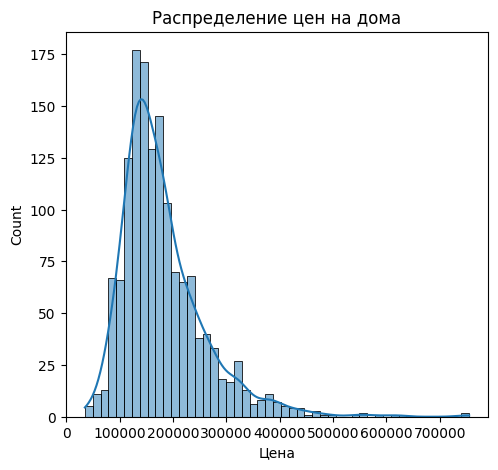

In [21]:
# a. Распределение целевой переменной
plt.figure(figsize=(12, 5))

# Гистограмма SalePrice
plt.subplot(121)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение цен на дома')
plt.xlabel('Цена')

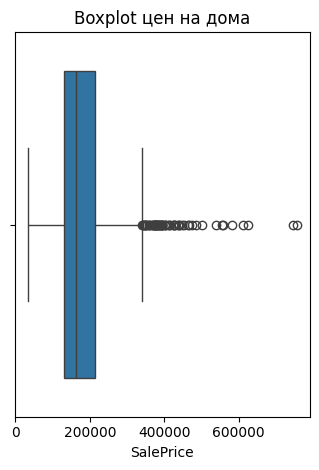

In [22]:
# Boxplot для выявления выбросов
plt.subplot(122)
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot цен на дома')

plt.tight_layout()
plt.show()

In [24]:
import numpy as np

# Проверка выбросов статистическим методом
z_scores = np.abs(stats.zscore(df['SalePrice']))
outliers = df[z_scores > 3]
print(f"Количество выбросов в SalePrice: {len(outliers)}")

Количество выбросов в SalePrice: 22


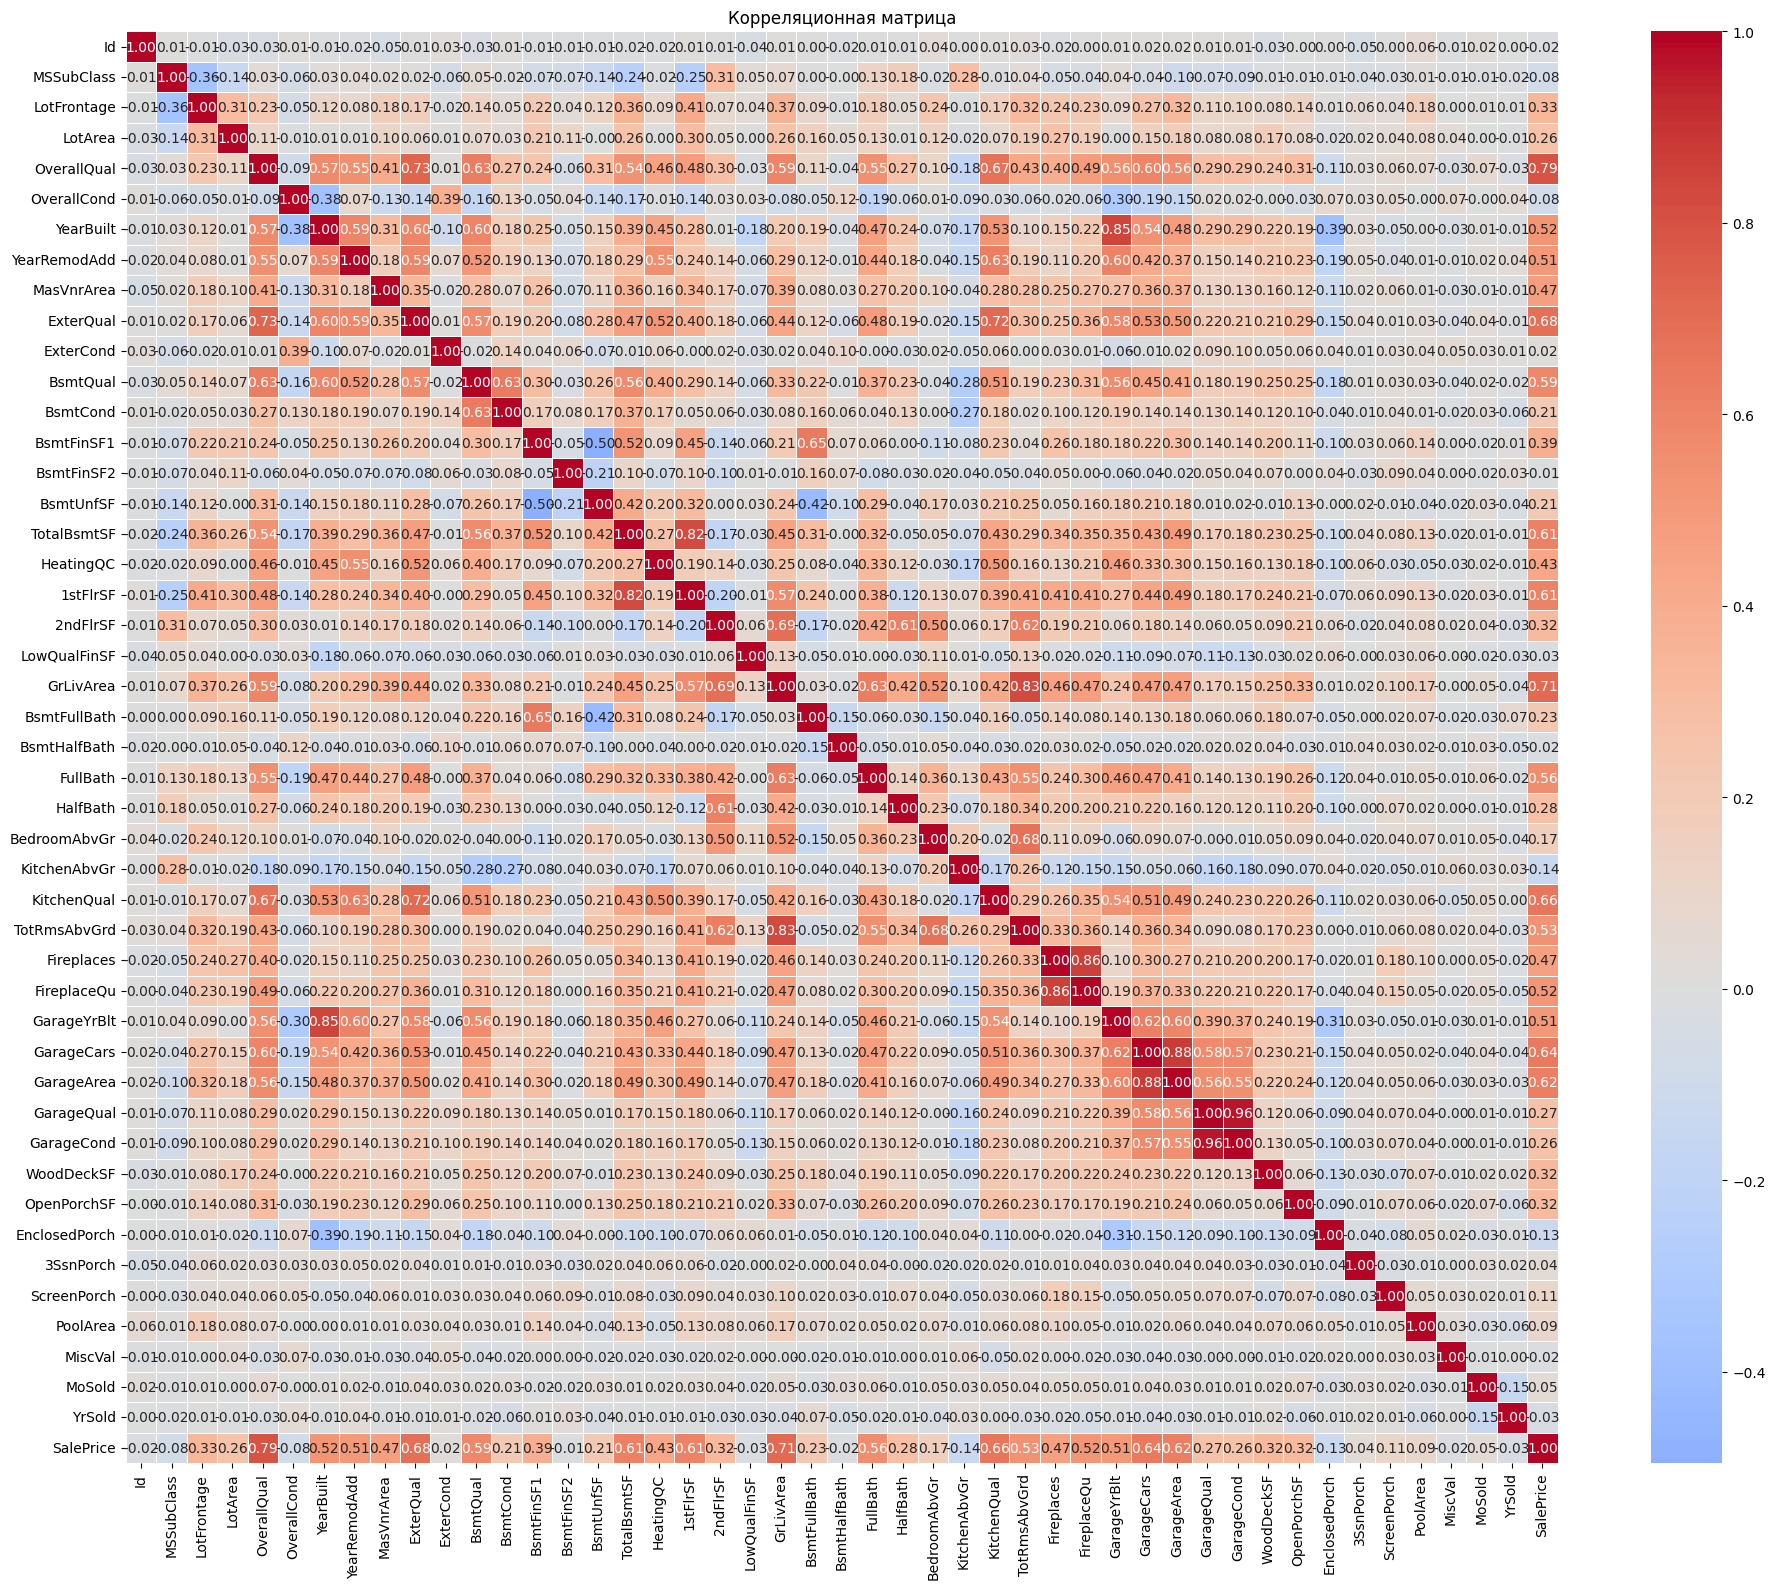

In [41]:
# b. Корреляционный анализ

# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',     # цветовая палитра 
            annot=True,           # показывать значения 
            fmt='.2f',            # формат значений 
            linewidths=0.5,       # ширина линий 
            center=0,             # центр цветовой шкалы
            square=True)          # квадратные ячейки
plt.title('Корреляционная матрица')
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

In [26]:
# Топ-10 коррелирующих с ценой признаков
top_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("\nТоп-10 признаков, коррелирующих с ценой:")
print(top_correlations[1:11])


Топ-10 признаков, коррелирующих с ценой:
OverallQual    0.790982
GrLivArea      0.708624
ExterQual      0.682639
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.585207
FullBath       0.560664
Name: SalePrice, dtype: float64


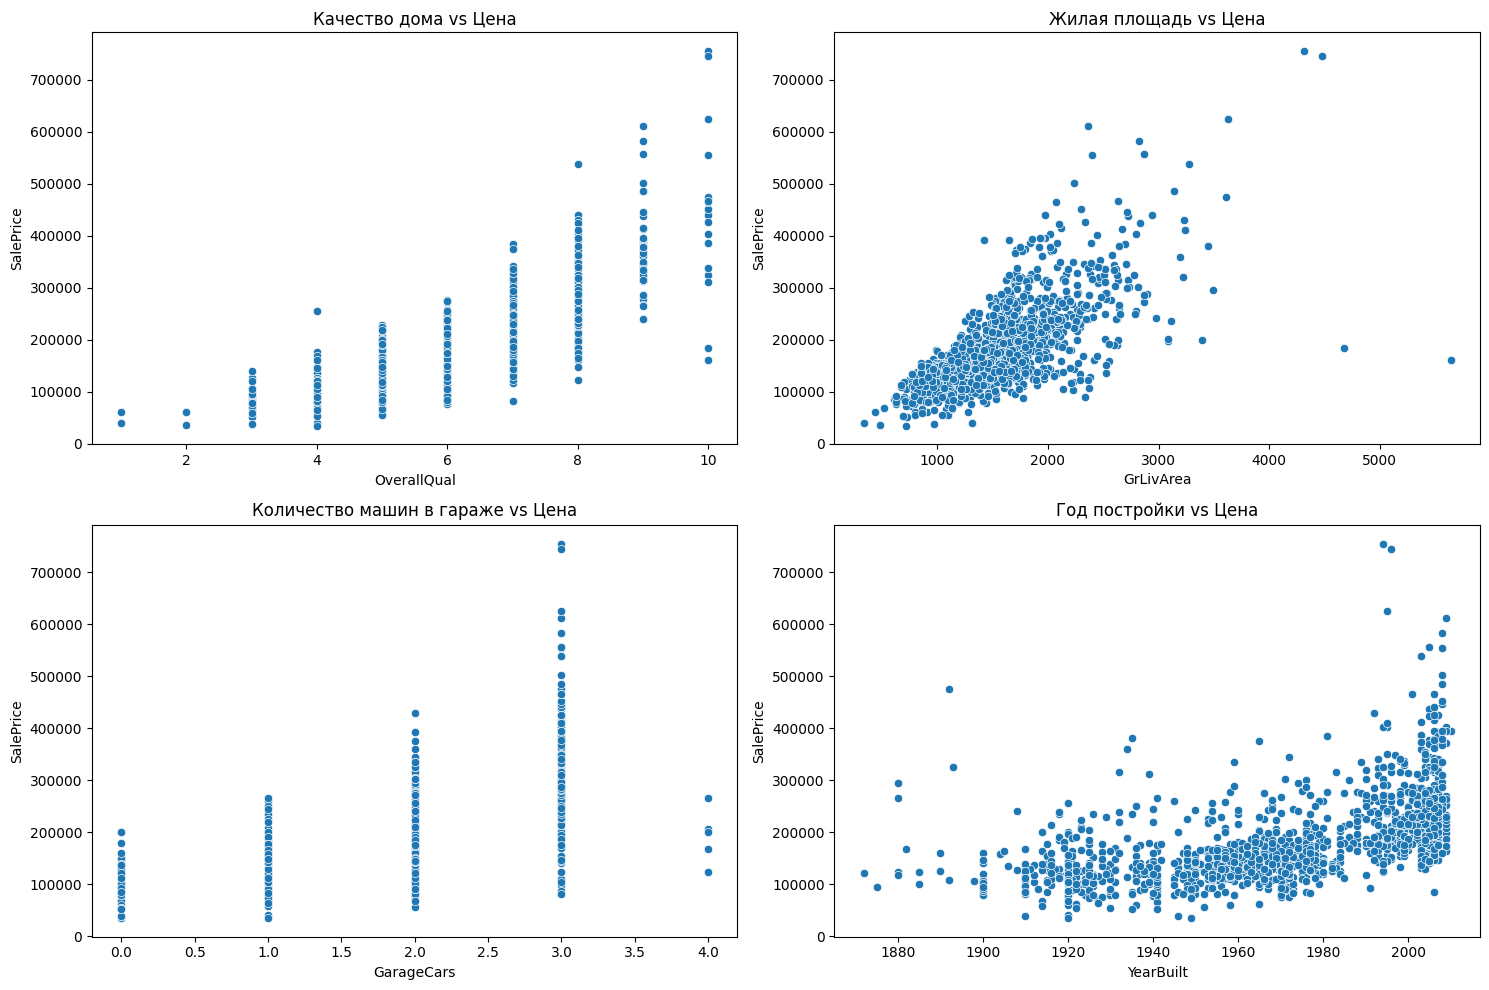

In [29]:
# c. Распределение важных характеристик
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# OverallQual vs SalePrice
sns.scatterplot(data=df, x='OverallQual', y='SalePrice', ax=axes[0,0])
axes[0,0].set_title('Качество дома vs Цена')

# GrLivArea vs SalePrice
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', ax=axes[0,1])
axes[0,1].set_title('Жилая площадь vs Цена')

# GarageCars vs SalePrice
sns.scatterplot(data=df, x='GarageCars', y='SalePrice', ax=axes[1,0])
axes[1,0].set_title('Количество машин в гараже vs Цена')

# YearBuilt vs SalePrice
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', ax=axes[1,1])
axes[1,1].set_title('Год постройки vs Цена')

plt.tight_layout()
plt.show()

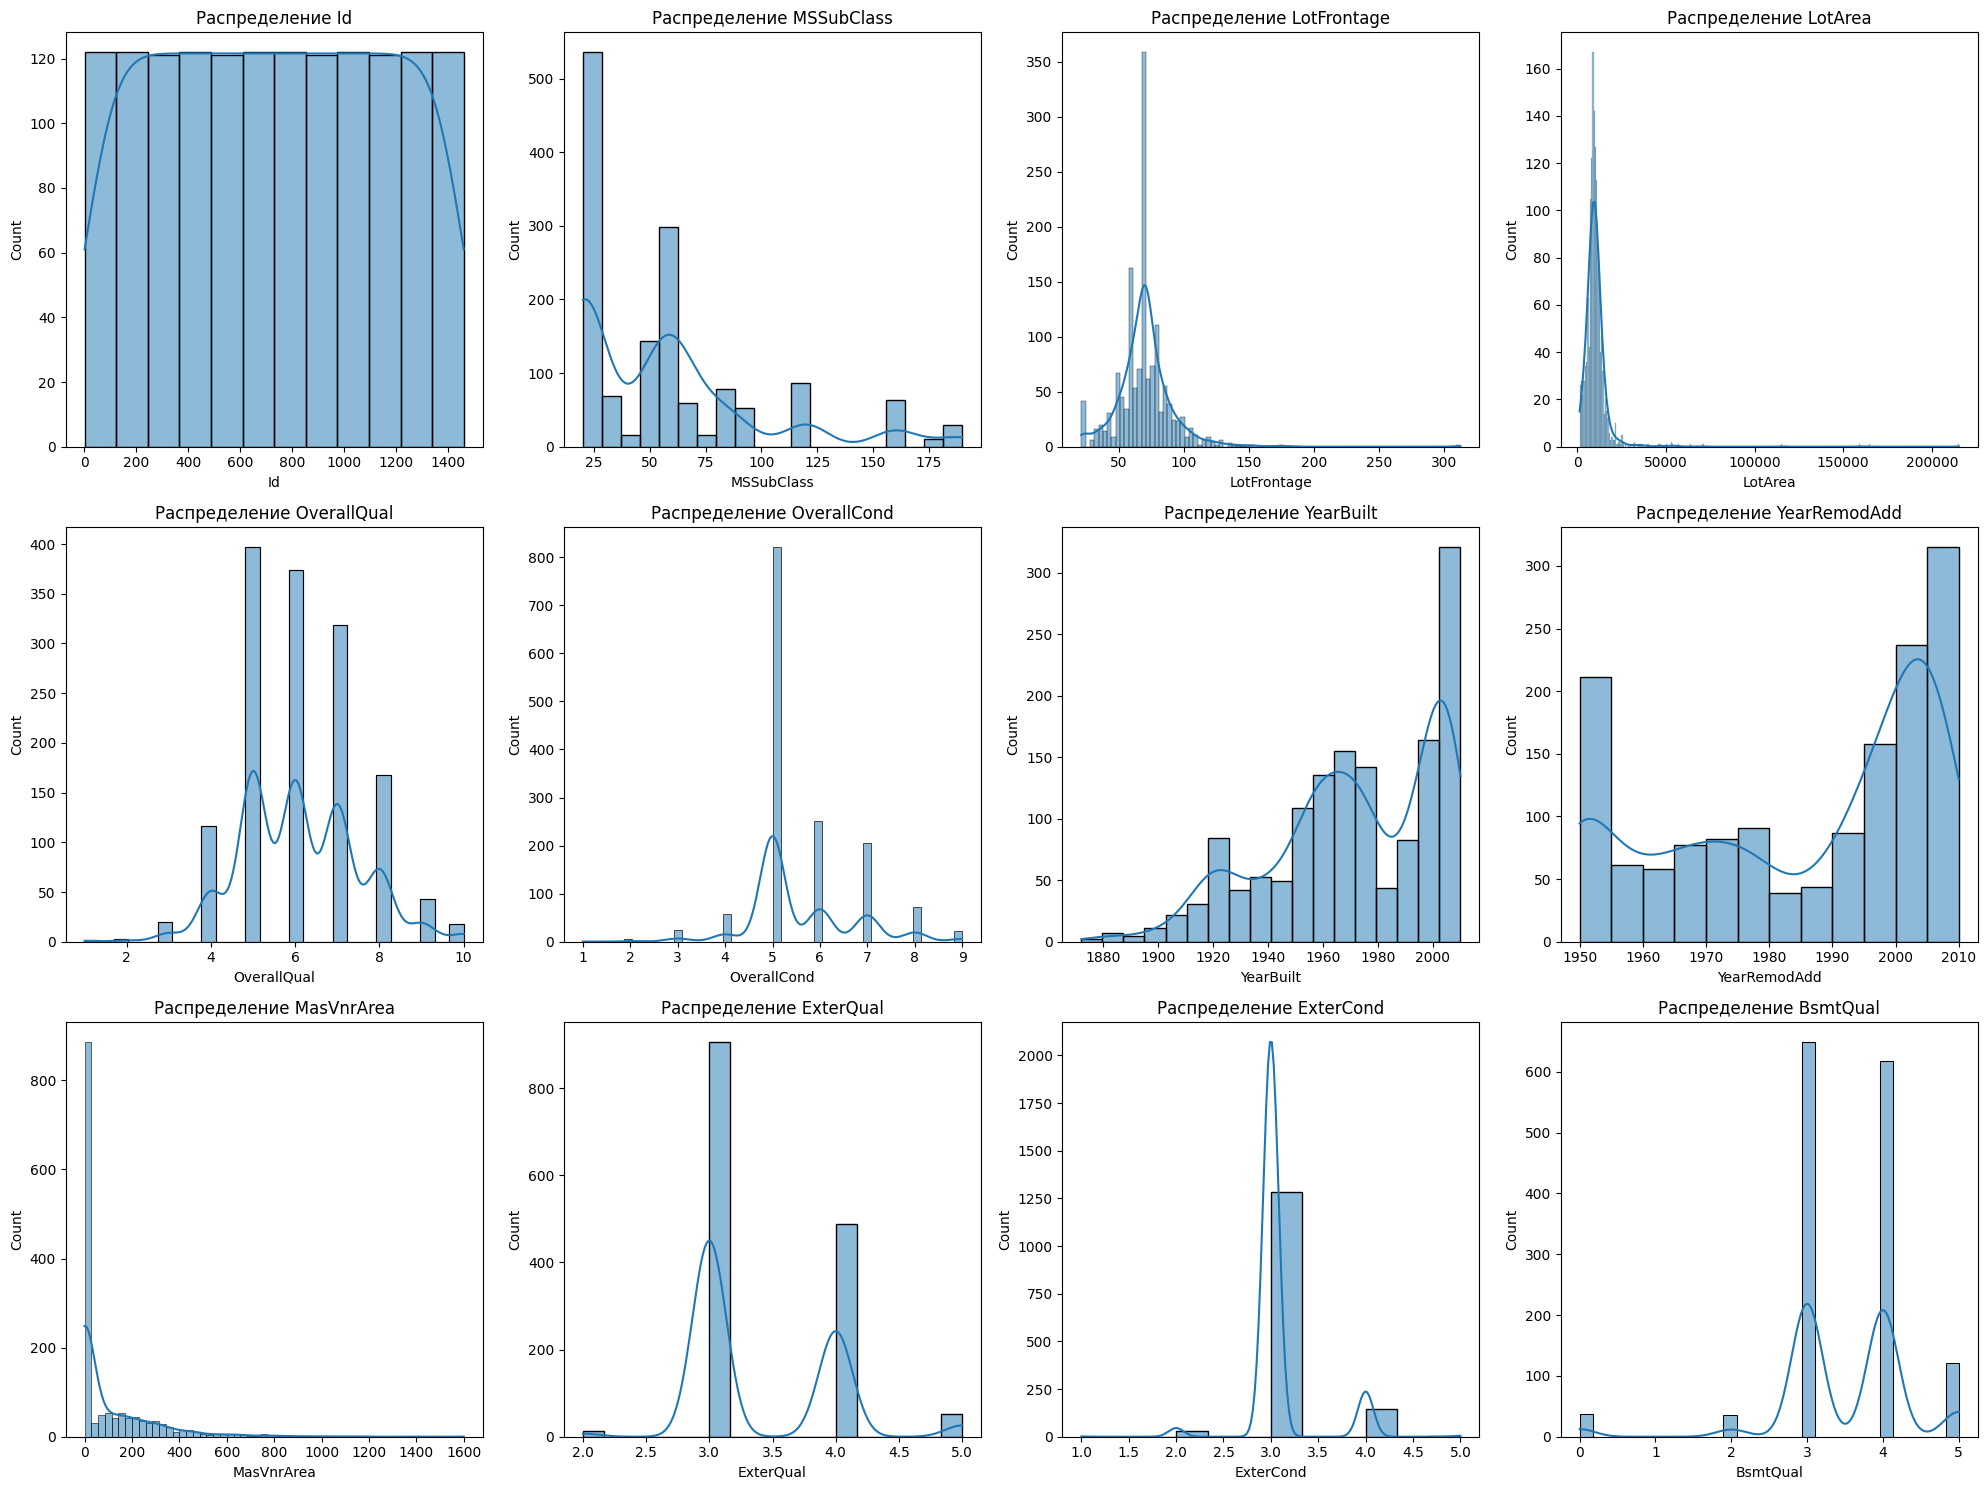

In [30]:
# Распределение количественных признаков
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_columns[:12], 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [31]:
# Дополнительный анализ категориальных признаков
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:6], 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

In [32]:
# Статистическое описание
print("\nОписательная статистика:")
print(df.describe())


Описательная статистика:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   ExterQual  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.00000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123     3.39589  ...   
std       1.112799    30.202904     20.645407   180.

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime

In [35]:
def feature_engineering(df):
    # Создаем копию DataFrame для работы
    df_engineered = df.copy()
    
    # a. Обработка категориальных переменных
    
    # Определим текущие категориальные столбцы
    categorical_columns = df_engineered.select_dtypes(include=['object']).columns
    
    # One-Hot Encoding для всех категориальных переменных
    df_engineered = pd.get_dummies(df_engineered, columns=categorical_columns)
    
    # b. Создание новых признаков
    
    # 1. Возраст недвижимости
    current_year = datetime.now().year
    df_engineered['PropertyAge'] = current_year - df_engineered['YearBuilt']
    
    # 2. Общая площадь
    df_engineered['TotalArea'] = (
        df_engineered['TotalBsmtSF'] + 
        df_engineered['1stFlrSF'] + 
        df_engineered['2ndFlrSF']
    )
    
    # 3. Признак качества дома
    df_engineered['QualityScore'] = (
        df_engineered['OverallQual'] + 
        df_engineered.filter(regex='^ExterQual').max(axis=1) + 
        df_engineered.filter(regex='^BsmtQual').max(axis=1) + 
        df_engineered.filter(regex='^KitchenQual').max(axis=1)
    ) / 4
    
    # 4. Признак площади гаража
    df_engineered['GarageScore'] = (
        df_engineered['GarageCars'] * 
        df_engineered['GarageArea']
    )
    
    # 5. Признак комнат и ванных
    df_engineered['TotalRooms'] = (
        df_engineered['TotRmsAbvGrd'] + 
        df_engineered['FullBath'] * 2 + 
        df_engineered['HalfBath']
    )
    
    # 6. Признак наличия особенностей
    df_engineered['HasPool'] = (df_engineered['PoolArea'] > 0).astype(int)
    df_engineered['HasFireplace'] = (df_engineered['Fireplaces'] > 0).astype(int)
    
    # 7. Признак времени ремонта
    df_engineered['YearsSinceRemodel'] = current_year - df_engineered['YearRemodAdd']
    
    # 8. Признак плотности застройки
    df_engineered['BuildingEfficiency'] = df_engineered['GrLivArea'] / df_engineered['LotArea']
    
    # 9. Признак качества внешних характеристик
    df_engineered['ExteriorScore'] = (
        df_engineered.filter(regex='^ExterQual').max(axis=1) + 
        df_engineered.filter(regex='^ExterCond').max(axis=1)
    ) / 2
    
    # 10. Признак подвала
    df_engineered['BasementScore'] = (
        df_engineered['TotalBsmtSF'] / df_engineered['GrLivArea'] * 
        (df_engineered.filter(regex='^BsmtQual').max(axis=1) + 1)
    )
    
    # Логарифмическое преобразование некоторых признаков для нормализации
    log_transform_columns = [
        'LotArea', 'TotalArea', 'GarageArea', 
        'TotalBsmtSF', 'GrLivArea'
    ]
    
    for col in log_transform_columns:
        df_engineered[f'{col}_log'] = np.log1p(df_engineered[col])
    
    return df_engineered

df_features = feature_engineering(df)

In [36]:
# Вывод информации о новом датасете
print("Количество признаков после инженерии:", df_features.shape[1])

# Определение новых признаков
original_columns = set(df.columns)
new_features = list(set(df_features.columns) - original_columns)
print("\nНовые признаки:")
print(new_features)

# Корреляция новых признаков с целевой переменной
correlations_with_price = df_features[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("\nКорреляция новых признаков с ценой:")
print(correlations_with_price)

Количество признаков после инженерии: 283

Новые признаки:
['GrLivArea_log', 'TotalRooms', 'LotArea_log', 'GarageScore', 'PropertyAge', 'YearsSinceRemodel', 'HasPool', 'ExteriorScore', 'TotalBsmtSF_log', 'HasFireplace', 'QualityScore', 'BasementScore', 'TotalArea_log', 'BuildingEfficiency', 'GarageArea_log', 'TotalArea']

Корреляция новых признаков с ценой:
SalePrice             1.000000
QualityScore          0.808788
TotalArea             0.782260
TotalArea_log         0.761613
GrLivArea_log         0.695147
GarageScore           0.680058
TotalRooms            0.623973
ExteriorScore         0.589888
HasFireplace          0.471908
LotArea_log           0.388528
GarageArea_log        0.371597
TotalBsmtSF_log       0.325883
BasementScore         0.260876
HasPool               0.093708
BuildingEfficiency   -0.002416
YearsSinceRemodel    -0.507101
PropertyAge          -0.522897
Name: SalePrice, dtype: float64


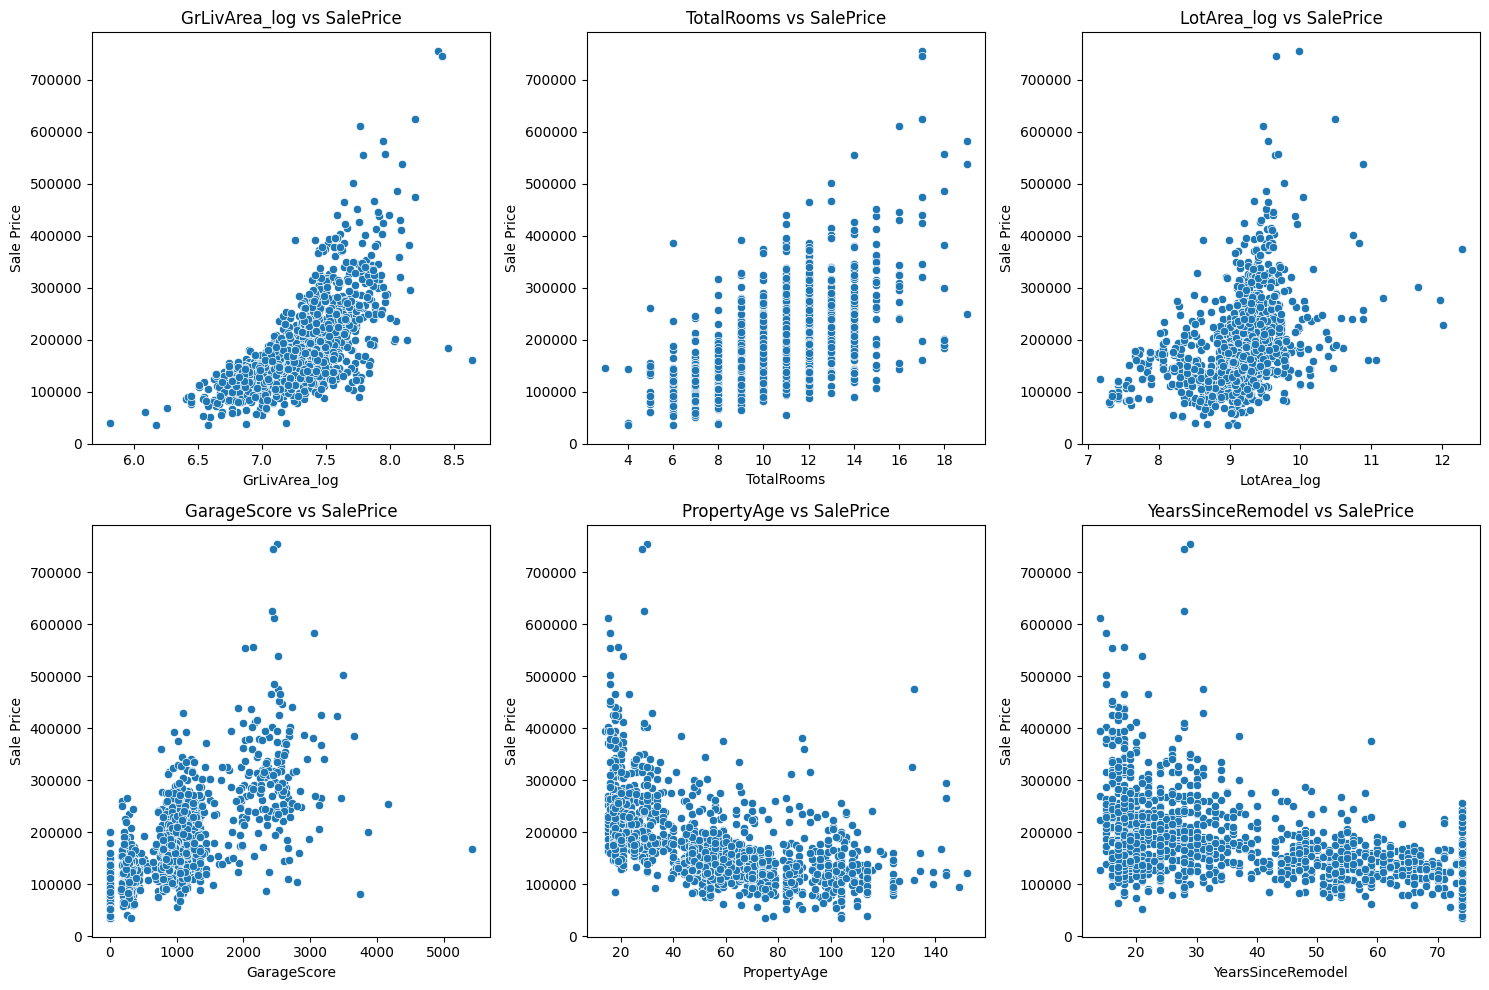

In [37]:
# Дополнительная визуализация новых признаков
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(new_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df_features[feature], y=df_features['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [39]:
# Сохранение очищенного датасета
output_path = 'cleaned_house_prices.csv'
df.to_csv(output_path, index=False)

print(f"Датасет сохранен по пути: {output_path}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество признаков: {df.shape[1]}")

Датасет сохранен по пути: cleaned_house_prices.csv
Количество строк: 1460
Количество признаков: 267
